In [108]:
import joblib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [19]:
def loadFile(path):
    df_pulsar = pd.read_csv(path)
    return df_pulsar

In [20]:
df_pulsar = loadFile('Pulsar.csv')
df_pulsar.head()

Mean_Integrated         SD        EK  Skewness  Mean_DMSNR_Curve  \
0       140.562500  55.683782 -0.234571 -0.699648          3.199833   
1       102.507812  58.882430  0.465318 -0.515088          1.677258   
2       103.015625  39.341649  0.323328  1.051164          3.121237   
3       136.750000  57.178449 -0.068415 -0.636238          3.642977   
4        88.726562  40.672225  0.600866  1.123492          1.178930   

   SD_DMSNR_Curve  EK_DMSNR_Curve  Skewness_DMSNR_Curve  Class  
0       19.110426        7.975532             74.242225      0  
1       14.860146       10.576487            127.393580      0  
2       21.744669        7.735822             63.171909      0  
3       20.959280        6.896499             53.593661      0  
4       11.468720       14.269573            252.567306      0

In [31]:
df_pulsar.shape

(17898, 9)

In [32]:
df_pulsar.describe()

Mean_Integrated            SD            EK      Skewness  \
count     17898.000000  17898.000000  17898.000000  17898.000000   
mean        111.079968     46.549532      0.477857      1.770279   
std          25.652935      6.843189      1.064040      6.167913   
min           5.812500     24.772042     -1.876011     -1.791886   
25%         100.929688     42.376018      0.027098     -0.188572   
50%         115.078125     46.947479      0.223240      0.198710   
75%         127.085938     51.023202      0.473325      0.927783   
max         192.617188     98.778911      8.069522     68.101622   

       Mean_DMSNR_Curve  SD_DMSNR_Curve  EK_DMSNR_Curve  Skewness_DMSNR_Curve  \
count      17898.000000    17898.000000    17898.000000          17898.000000   
mean          12.614400       26.326515        8.303556            104.857709   
std           29.472897       19.470572        4.506092            106.514540   
min            0.213211        7.370432       -3.139270             -1.976976   
25%            1.923077       14.437332        5.781506             34.960504   
50%            2.801839       18.461316        8.433515             83.064556   
75%            5.464256       28.428104       10.702959            139.309330   
max          223.392141      110.642211       34.539844           1191.000837   

              Class  
count  17898.000000  
mean       0.091574  
std        0.288432  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

In [29]:
df_pulsar.columns

Index(['Mean_Integrated', 'SD', 'EK', 'Skewness', 'Mean_DMSNR_Curve',
       'SD_DMSNR_Curve', 'EK_DMSNR_Curve', 'Skewness_DMSNR_Curve', 'Class'],
      dtype='object')

In [28]:
df_pulsar.isna().sum()

Mean_Integrated         0
SD                      0
EK                      0
Skewness                0
Mean_DMSNR_Curve        0
SD_DMSNR_Curve          0
EK_DMSNR_Curve          0
Skewness_DMSNR_Curve    0
Class                   0
dtype: int64

In [158]:
def drawPairPlot(features):
    sns.pairplot(df_pulsar[features])
    plt.show()

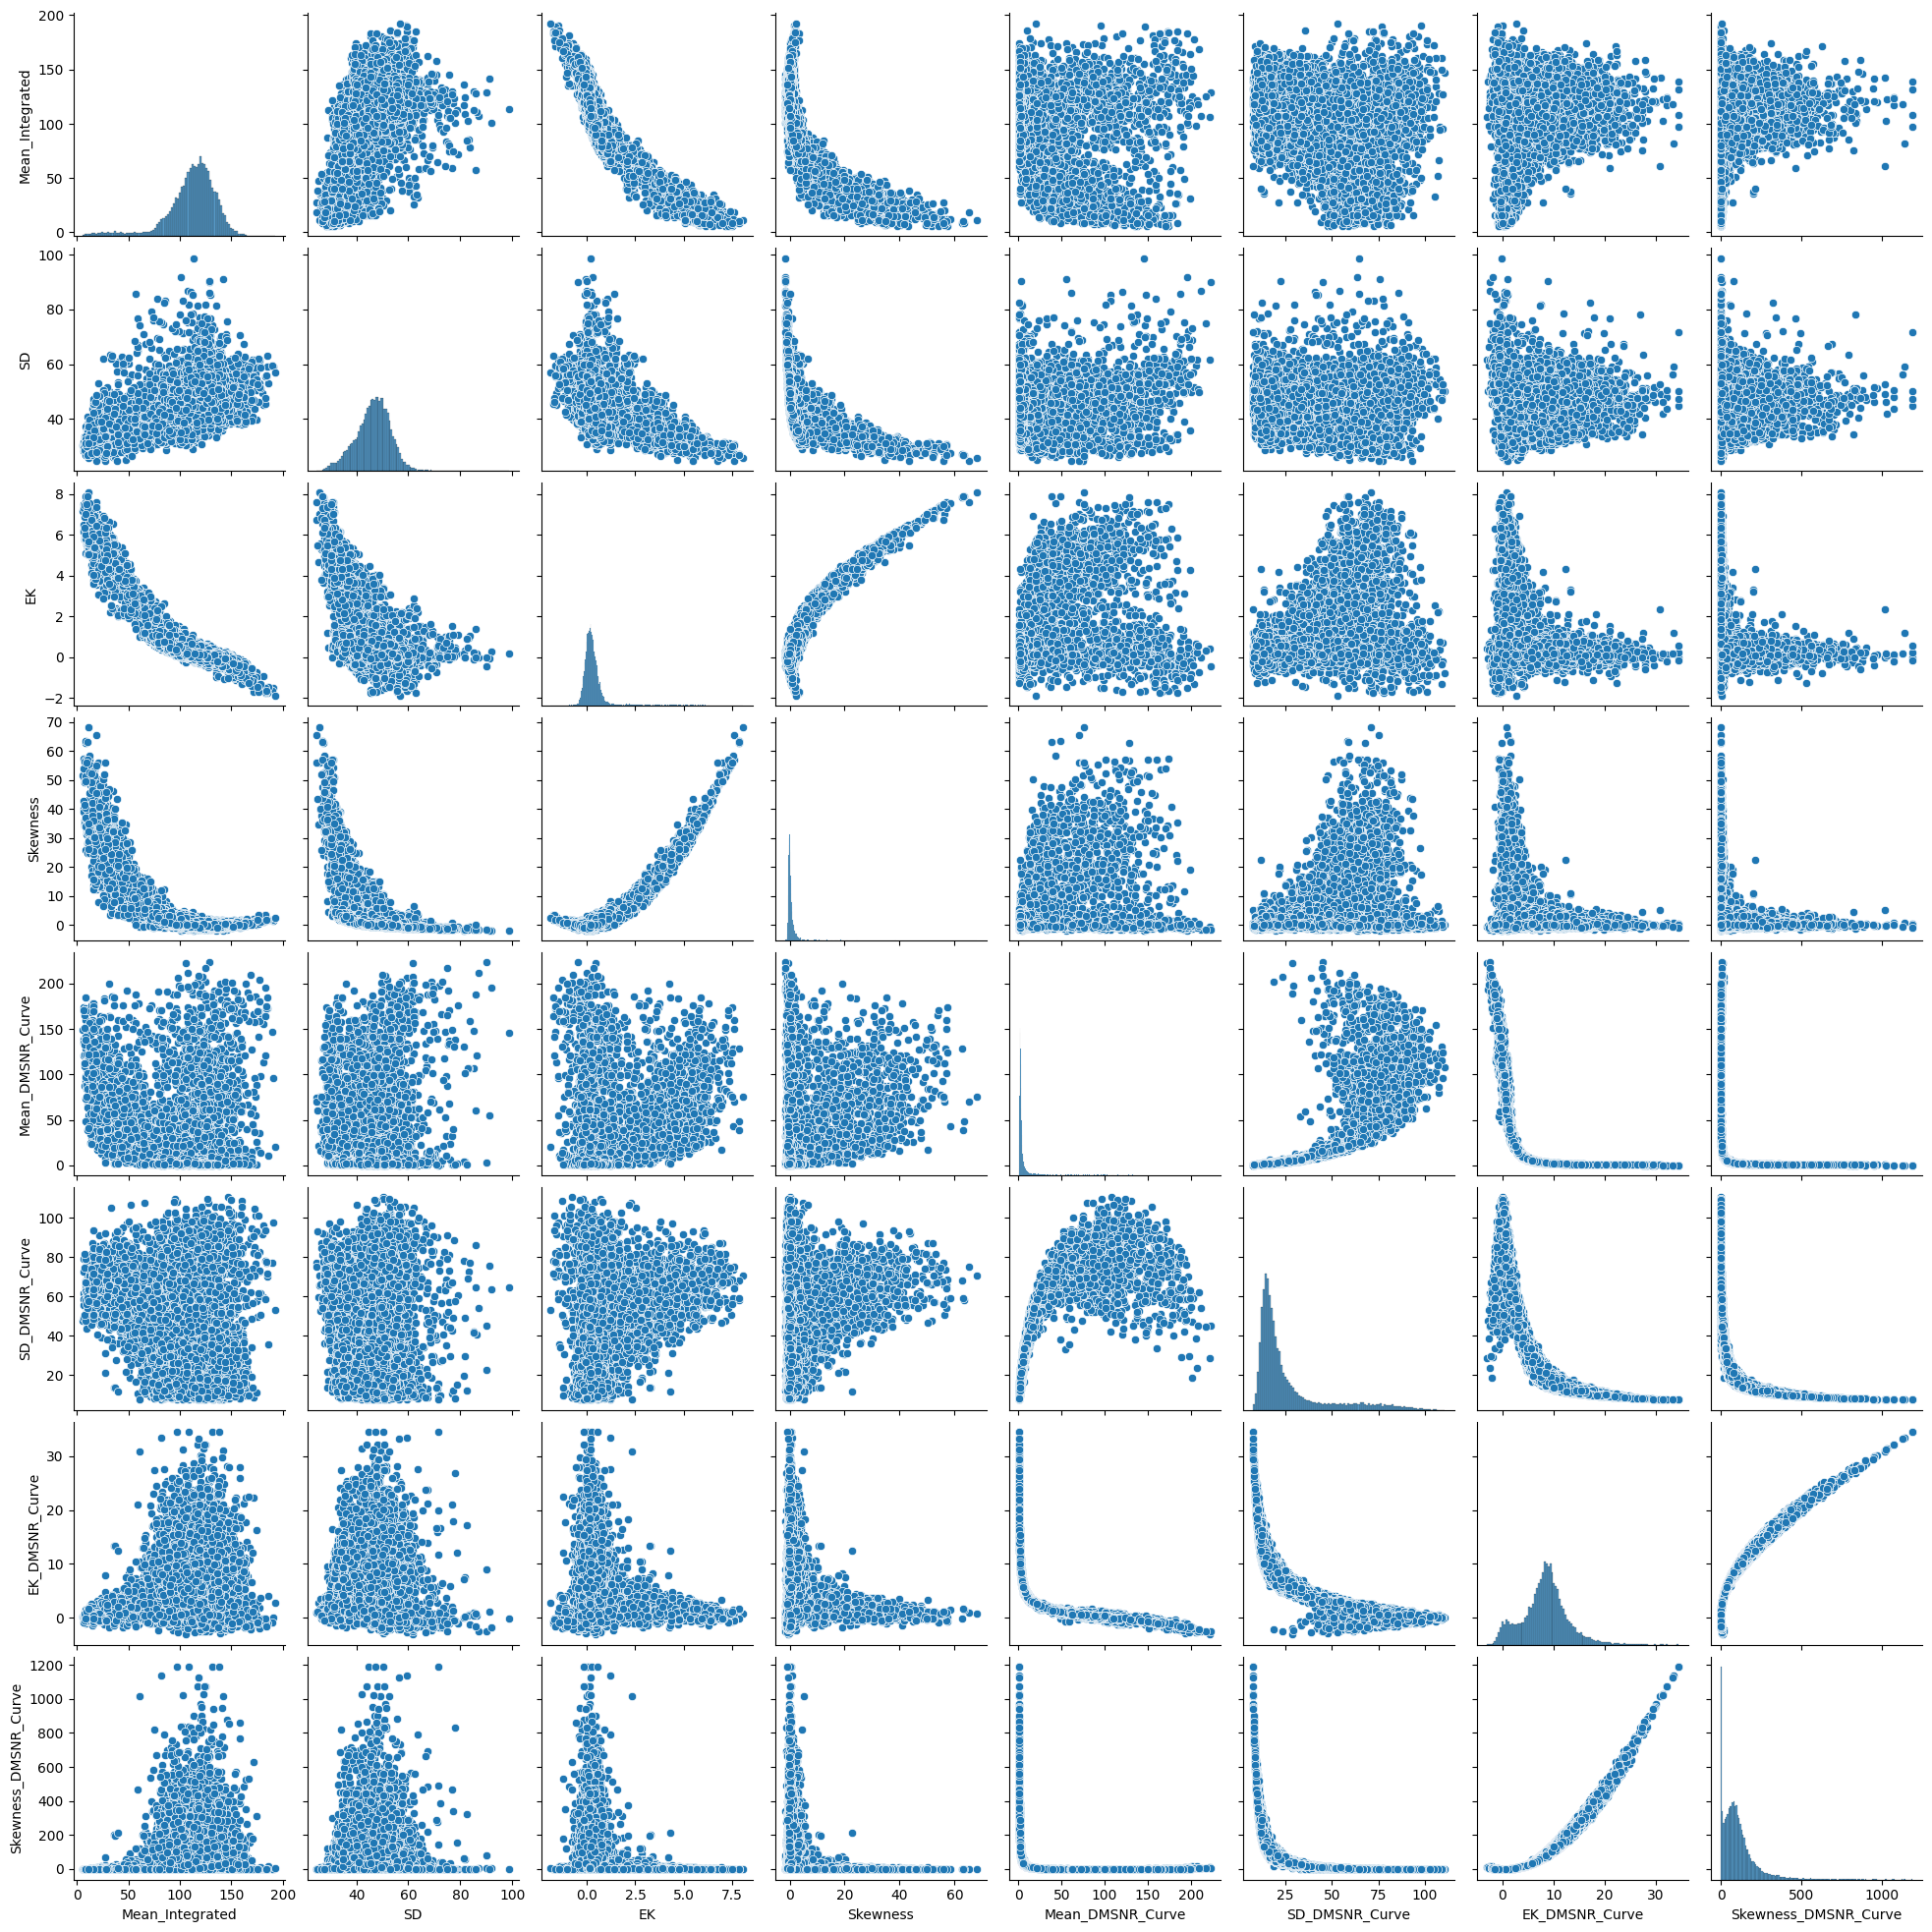

In [159]:
selected_features = ['Mean_Integrated', 'SD', 'EK', 'Skewness', 'Mean_DMSNR_Curve', 'SD_DMSNR_Curve', 'EK_DMSNR_Curve', 'Skewness_DMSNR_Curve']
drawPairPlot(selected_features)

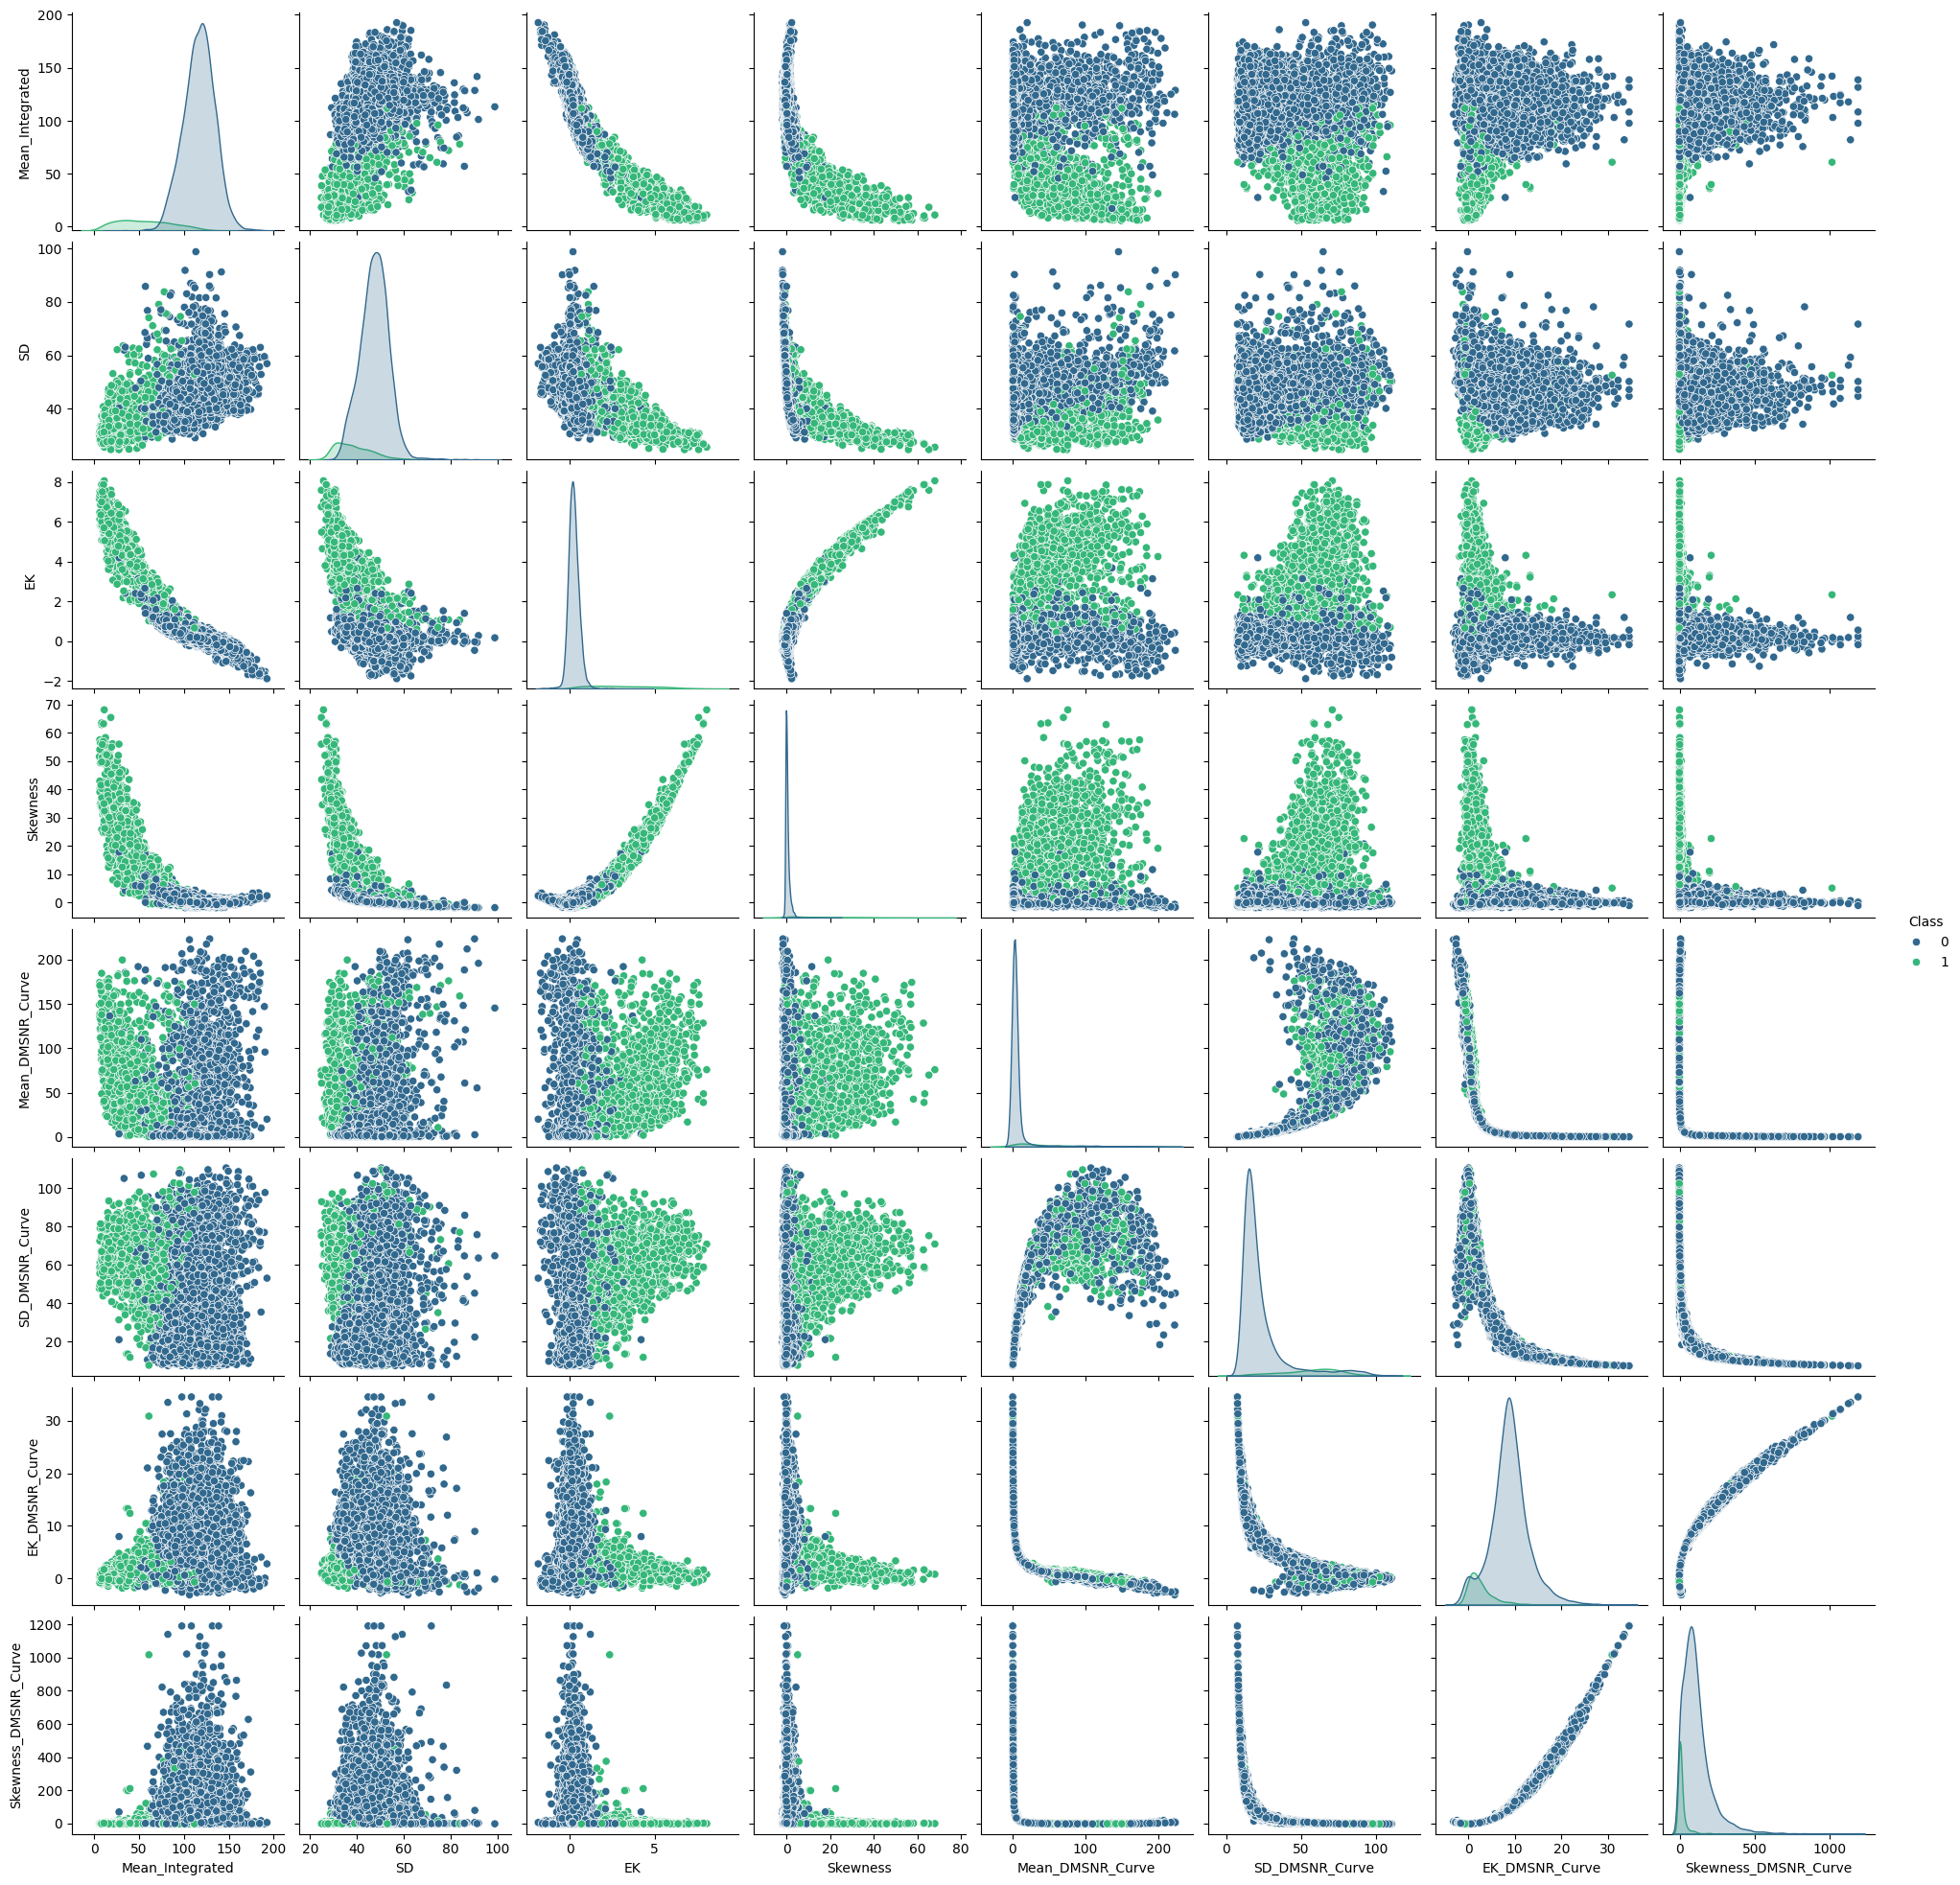

In [160]:
sns.pairplot(df_pulsar, vars=selected_features, hue='Class', palette='viridis')
plt.show()

In [207]:
def splitDataset( df, target_column, test_size=0.2, random_state=28): 
    X = df.drop(target_column, axis=1)
    Y = df[target_column]
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=random_state)
    return X_train, X_test, Y_train, Y_test

In [208]:
X_train, X_test, Y_train, Y_test = splitDataset(df_pulsar, 'Class')

print("Shape of training set:", X_train.shape, Y_train.shape)
print("Shape of test set:", X_test.shape, Y_test.shape)

Shape of training set: (14318, 8) (14318,)
Shape of test set: (3580, 8) (3580,)


Para el proceso de selección de características con SelectKBest y el entrenamiento de un RandomForestClassifier, generalmente no es necesario escalar las características porque:

SelectKBest: Esta técnica selecciona las características basadas en estadísticas univariadas como la prueba ANOVA (f_classif), que no se ven afectadas por la escala de las características.

RandomForestClassifier: Los modelos de árboles de decisión, como el Random Forest, son invariantes a la escala de las características.

Por ello no hare ningun escalado a los datos.

In [209]:
class_counts = df_pulsar['Class'].value_counts()
print(class_counts)

class_percentages = df_pulsar['Class'].value_counts(normalize=True) * 100
print(class_percentages)

Class
0    16259
1     1639
Name: count, dtype: int64
Class
0    90.842552
1     9.157448
Name: proportion, dtype: float64


In [183]:
def select_and_transform_features(X_train, X_test, Y_train, k=5):
    selector = SelectKBest(score_func=f_classif, k=k)
    selector.fit(X_train, Y_train)

    selected_features = X_train.columns[selector.get_support()]
    print( selected_features)

    X_train_selected = selector.transform(X_train)
    X_test_selected = selector.transform(X_test)
    
    return X_train_selected, X_test_selected, selected_features

In [182]:
X_train_selected, X_test_selected, selected_features = select_and_transform_features(X_train, X_test, Y_train)

Index(['Mean_Integrated', 'EK', 'Skewness', 'Mean_DMSNR_Curve',
       'SD_DMSNR_Curve'],
      dtype='object')


In [212]:
model = RandomForestClassifier()
model.fit(X_train, Y_train)

feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)
print(feature_importances.sort_values(ascending=False))

EK                      0.328852
Skewness                0.209938
Mean_Integrated         0.183130
Mean_DMSNR_Curve        0.072910
SD_DMSNR_Curve          0.057655
EK_DMSNR_Curve          0.052312
Skewness_DMSNR_Curve    0.048864
SD                      0.046339
dtype: float64


He obtenido los features mas importantes, mediante SelectKBest y RandomForestClassifier, por lo que se puede ver, ambos coindiciden en que EK, Skewness y Mean_integrated, son las mas importantes, siendo Mean_DMSNR_Curve y SD_DMSNR_Curve los que siguen en importancia. Por lo que usare el resultado de SelectKBest para entrenar el modelo.

Existe un desequilibrio de clases, por lo que empleare el ajuste de pesos de las clases de RandomForestClassifier

In [216]:
def evaluate_model_with_cross_validation(model, X_train_selected, Y_train, cv=5, scoring='accuracy'):
    cv_scores = cross_val_score(model, X_train_selected, Y_train, cv=cv, scoring=scoring)
    mean_score = cv_scores.mean()
    print("Cross-validated scores:", cv_scores)
    print("Mean cross-validated score:", mean_score)
    
    return cv_scores, mean_score

In [217]:
model = RandomForestClassifier(random_state=28)
cv_scores, mean_score = evaluate_model_with_cross_validation(model, X_train_selected, Y_train)

Cross-validated scores: [0.98079609 0.98114525 0.97765363 0.97659797 0.97799511]
Mean cross-validated score: 0.9788376112488949


In [196]:
model = RandomForestClassifier(random_state=30, class_weight='balanced')
model.fit(X_train_selected, Y_train)

RandomForestClassifier(class_weight='balanced', random_state=30)

In [199]:
Y_predictions = model.predict(X_test_selected)

accuracy = accuracy_score(Y_test, Y_predictions)
report = classification_report(Y_test, Y_predictions)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.9826815642458101
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      3263
           1       0.94      0.86      0.90       317

    accuracy                           0.98      3580
   macro avg       0.96      0.93      0.94      3580
weighted avg       0.98      0.98      0.98      3580



In [200]:
#Best parameters: {'max_depth': None, 'n_estimators': 300}
#Best parameters: {'min_samples_leaf': 2, 'min_samples_split': 5}
#Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
param_grid = {
    'n_estimators': [300],
    'max_depth': [None],
    'min_samples_leaf': [1],
    'min_samples_split': [10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=30, class_weight='balanced'),
                           param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train_selected, Y_train)

best_model = grid_search.best_estimator_

In [201]:
Y_predictions = best_model.predict(X_test_selected)

accuracy = accuracy_score(Y_test, Y_predictions)
report = classification_report(Y_test, Y_predictions)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Accuracy: 0.982122905027933
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      3263
           1       0.91      0.89      0.90       317

    accuracy                           0.98      3580
   macro avg       0.95      0.94      0.94      3580
weighted avg       0.98      0.98      0.98      3580



Me quedo con el modelo que trabaja con los hiperparametros ajustados:

Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}

Decidi usar el modelo con los hiperparámetros ajustados porque ofrece un mejor equilibrio al aumentar el recall sin sacrificar mucho la precisión, lo que puede ser crucial para identificar más púlsares correctamente.

In [202]:
def saveModel (model):
    joblib.dump(model, 'ramdom_forest_model.pkl')

In [203]:
saveModel(best_model)

In [204]:
model_saved = joblib.load('ramdom_forest_model.pkl')
model_saved

RandomForestClassifier(class_weight='balanced', min_samples_split=10,
                       n_estimators=300, random_state=30)